In [538]:
#### NEW PILOT DATA WITH BALANCED TRIAL SPREADSHEET ####


In [2]:
#import packages
from __future__ import division 
import sys
import pandas as pd
import numpy as np
import scipy
from numpy import mean, std, cov 
from numpy.random import seed, randn
import matplotlib.pyplot as plt
from matplotlib import pyplot
from math import sqrt
import scipy.stats as stats 
from scipy.stats import t, pearsonr, sem
import seaborn as sns
from statistics import mean, stdev

In [3]:
#import excel file containing data summary

#wtpdata = pd.read_csv(r'new_pilot_wtp.csv', encoding='utf-8-sig')
wtpdata = pd.read_csv(r'updated_allwtp.csv', encoding='utf-8-sig')
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(wtpdata)

                 participant  avg_spent_social  avg_spent_nonsocial  \
0   5914b7b50a4b9d0001add64f          0.020870             0.022963   
1   5beaed3f0af61d0001968d9a          0.033846             0.030000   
2   5c523d16102de10001022098          0.029211             0.031667   
3   5dc368ce880a2927e264dbec          0.029474             0.032258   
4   5e70d4869ffb1404cb1f5070          0.024444             0.022174   
5   5efc9ea8f8e7950584b12e87          0.032258             0.031579   
6   5f2f566ddaea2a3417b75920          0.021304             0.022593   
7   5f3964ca4539e00bd5ce47fb          0.028750             0.028077   
8   5f793609f8089e53266336f5          0.030233             0.030000   
9   5f8c70c9c8e71c0b49e49797          0.028000             0.029143   
10  5f94977cf830e82e361b9de1          0.030000             0.030882   
11  60fc6bdffe3e6e8caf924670          0.022273             0.023571   
12  60fd7f782b0c5f0b6503302a          0.030476             0.031250   
13  60

In [628]:
socialavg= wtpdata.avg_spent_social
#calculate group mean for av spent on social experiences
social_M = mean(socialavg)
print('group mean: %.12f'% (social_M))
print('standard error of the mean: %.12f'% (sem(socialavg)))

group mean: 0.028782548388
standard error of the mean: 0.000636588329


In [629]:
nonsocialavg = wtpdata.avg_spent_nonsocial
#calculate group mean for av spent on non-social experiences


nonsocial_M = mean(nonsocialavg)
print('group mean: %.12f'% (nonsocial_M))
print('standard error of the mean: %.12f'% (sem(nonsocialavg)))

group mean: 0.028080804429
standard error of the mean: 0.000570724950


In [12]:
#sample size
n = len(wtpdata)
print(n)

49


In [631]:
#Calculate STD
# sum squared difference between observations
d1 = sum([(socialavg[i]-nonsocialavg[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([socialavg[i]-nonsocialavg[i] for i in range(n)])
print(d1,d2)

# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)

0.0004517763286681121 0.034385453999999996
0.0029848455572825984


In [632]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)

0.00042640650818322835


In [633]:
# calculate the t statistic
t_stat = (social_M - nonsocial_M) / sed
print(t_stat)

1.6457158737411424


In [634]:
# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

48


In [635]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=1.646, df=48, cv=1.677, p=0.106
Accept null hypothesis that the means are equal.
Accept null hypothesis that the means are equal.


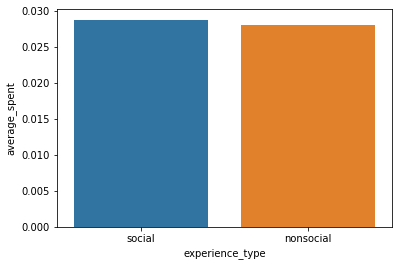

In [636]:
wtp_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'average_spent': [social_M, nonsocial_M]})

wtp_plot = sns.barplot(x=wtp_means.experience_type, y=wtp_means.average_spent, data=wtp_means)

In [637]:
#calculate effect size- cohens d

cohens_d = (mean(socialavg) - mean(nonsocialavg)) / (sqrt((stdev(socialavg) ** 2 + stdev(nonsocialavg) ** 2) / 2))

print(cohens_d)

0.16582322907868988


In [638]:
prop_social = wtpdata['prop_social']
aq = wtpdata.AQ #autism quotient
mspss = wtpdata.MSPSS #perceived social support

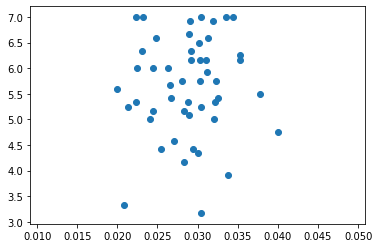

[[1.98569904e-05 2.35005980e-04]
 [2.35005980e-04 9.27083333e-01]]
Pearsons correlation: 0.055
p value: 0.7086
Accept null hypothesis that the means are equal.


In [639]:
#amount spent on social / mulitdimensional scale of perceived social support
pyplot.scatter(socialavg, mspss)
pyplot.show()
covariance = cov(socialavg, mspss)
print(covariance)
corr, _ = pearsonr(socialavg, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

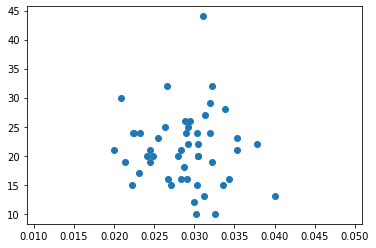

[[ 1.98569904e-05 -1.92809653e-03]
 [-1.92809653e-03  3.92363946e+01]]
Pearsons correlation: -0.069
p value: 0.6372
Accept null hypothesis that the means are equal.


In [640]:
#amount spent on social / aq
pyplot.scatter(socialavg, aq)
pyplot.show()
covariance = cov(socialavg, aq)
print(covariance)
corr, _ = pearsonr(socialavg, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [641]:
##### prop of chosen social // self report #####

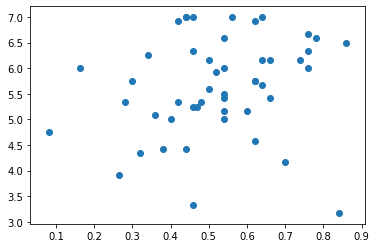

[[0.02816757 0.03141278]
 [0.03141278 0.92708333]]
Pearsons correlation: 0.194
p value: 0.1808
Accept null hypothesis that the means are equal.


In [642]:
#prop of chosen social // MSPSS
pyplot.scatter(prop_social, mspss)
pyplot.show()
covariance = cov(prop_social, mspss)
print(covariance)
corr, _ = pearsonr(prop_social, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

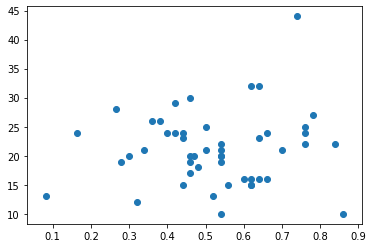

[[2.81675655e-02 9.34964598e-02]
 [9.34964598e-02 3.92363946e+01]]
Pearsons correlation: 0.089
p value: 0.5434
Accept null hypothesis that the means are equal.


In [643]:
# prop social // aq
pyplot.scatter(prop_social, aq)
pyplot.show()
covariance = cov(prop_social, aq)
print(covariance)
corr, _ = pearsonr(prop_social, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, aq)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [644]:
##### avg spent on nonsocial // self report #####

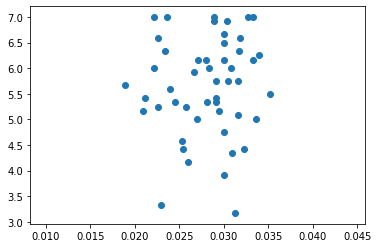

[[1.59606215e-05 2.75636613e-04]
 [2.75636613e-04 9.27083333e-01]]
Pearsons correlation: 0.072
p value: 0.6246
Accept null hypothesis that the means are equal.


In [645]:
# nonsocial // mspss (social support)
pyplot.scatter(nonsocialavg, mspss)
pyplot.show()
covariance = cov(nonsocialavg, mspss)
print(covariance)
corr, _ = pearsonr(nonsocialavg, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

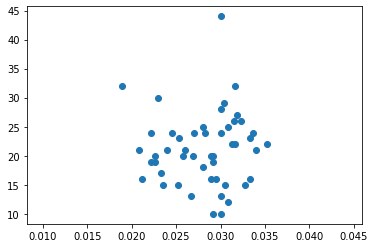

[[1.59606215e-05 6.62812920e-04]
 [6.62812920e-04 3.92363946e+01]]
Pearsons correlation: 0.026
p value: 0.8566
Accept null hypothesis that the means are equal.


In [646]:
# nonsocial // aq
pyplot.scatter(nonsocialavg, aq)
pyplot.show()
covariance = cov(nonsocialavg, aq)
print(covariance)
corr, _ = pearsonr(nonsocialavg, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [647]:
###################################

In [648]:
#### t stat for proportions ####

In [5]:
prop_socialavg= wtpdata.prop_social
#calculate group mean for prop of chosen social experiences
prop_soc_M = mean(prop_socialavg)
print('mean: %.12f'% (prop_soc_M))


prop_nonsocialavg= wtpdata.prop_nonsocial
#calculate group mean for prop of chosen social experiences
prop_nonsoc_M = mean(prop_nonsocialavg)
print('mean: %.12f'% (prop_nonsoc_M))

mean: 0.524073302776
mean: 0.475926697224


In [9]:
#Calculate STD
# sum squared difference between observations
d1 = sum([(prop_socialavg[i]-prop_nonsocialavg[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([prop_socialavg[i]-prop_nonsocialavg[i] for i in range(n)])
print(d1,d2)

# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)

5.521759268374845 2.3591836720000003
0.3356639124772182


In [10]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)

0.04795198749674546


In [17]:
# calculate the t statistic
t_stat = (prop_soc_M - prop_nonsoc_M) / sed
print(t_stat)

1.0040586024570546


In [13]:
#sample size
n = len(wtpdata)
print(n)

# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

49
48


In [14]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')



t=1.004, df=48, cv=1.677, p=0.320
Accept null hypothesis that the means are equal.
Accept null hypothesis that the means are equal.


  experience_type  prop_chosen
0          social     0.524073
1       nonsocial     0.475927


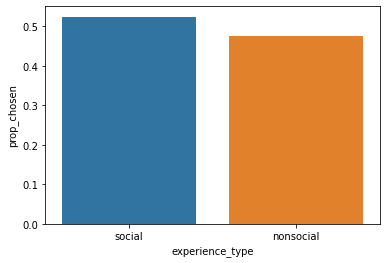

In [33]:
wtp_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'prop_chosen': [prop_soc_M, prop_nonsoc_M]})
print(wtp_means)
wtp_plot = sns.barplot(x=wtp_means.experience_type, y=wtp_means.prop_chosen, data=wtp_means)

wtp_means2 = pd.DataFrame({'experience_type': ['social','nonsocial'], 'prop_chosen': [prop_social, prop_nonsocial]})
print(wtp_means2)

In [22]:
#calculate effect size- cohens d

cohens_d = (mean(prop_socialavg) - mean(prop_nonsocialavg)) / (sqrt((stdev(prop_socialavg) ** 2 + stdev(prop_nonsocialavg) ** 2) / 2))
print(cohens_d)

0.2868738864163014


In [20]:
###################################

In [657]:
#### t stats for sums #####

In [658]:
social_sum= wtpdata.total_spent_social
#calculate group mean for prop of chosen social experiences
social_sum_M = mean(social_sum)
print('mean: %.12f'% (social_sum_M))

mean: 0.753061224490


In [659]:
nonsocial_sum= wtpdata.total_spent_nonsocial
#calculate group mean for prop of chosen social experiences
nonsocial_sum_M = mean(nonsocial_sum)
print('mean: %.12f'% (nonsocial_sum_M))


mean: 0.665306122449


In [660]:
# sum squared difference between observations
d1 = sum([(social_sum[i]-nonsocial_sum[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([social_sum[i]-nonsocial_sum[i] for i in range(n)])
print(d1,d2)

12.528000000000002 4.300000000000001


In [661]:
# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)

0.5031288159529097


In [662]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)


0.07187554513612995


In [663]:
# calculate the t statistic
t_stat = (social_sum_M - nonsocial_sum_M) / sed
print(t_stat)

1.2209312899764595


In [664]:
# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

48


In [665]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=1.221, df=48, cv=1.677, p=0.228
Accept null hypothesis that the means are equal.
Accept null hypothesis that the means are equal.


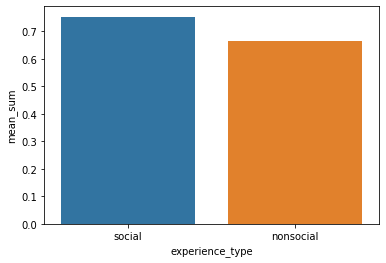

In [666]:
wtp_sum_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'mean_sum': [social_sum_M, nonsocial_sum_M]})

wtp_plot = sns.barplot(x=wtp_sum_means.experience_type, y=wtp_sum_means.mean_sum, data=wtp_sum_means)


In [667]:
#### sum // self-report ####

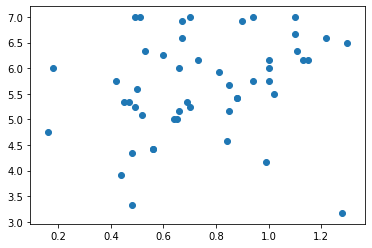

[[0.07634668 0.06104663]
 [0.06104663 0.92708333]]
Pearsons correlation: 0.229
p value: 0.1127
Accept null hypothesis that the means are equal.


In [668]:
#sum of social / mulitdimensional scale of perceived social support
pyplot.scatter(social_sum, mspss)
pyplot.show()
covariance = cov(social_sum, mspss)
print(covariance)
corr, _ = pearsonr(social_sum, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

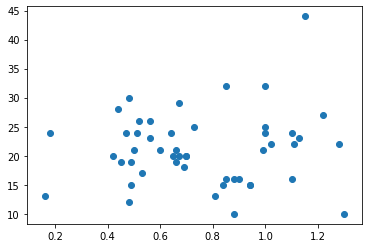

[[ 0.07634668  0.13359269]
 [ 0.13359269 39.23639456]]
Pearsons correlation: 0.077
p value: 0.5981
Accept null hypothesis that the means are equal.


In [669]:
#sum of social / aq
pyplot.scatter(social_sum, aq)
pyplot.show()
covariance = cov(social_sum, aq)
print(covariance)
corr, _ = pearsonr(social_sum, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

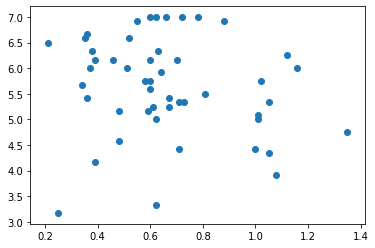

[[ 0.06788376 -0.04230159]
 [-0.04230159  0.92708333]]
Pearsons correlation: -0.169
p value: 0.2468
Accept null hypothesis that the means are equal.


In [670]:
#sum of nonsocial / mulitdimensional scale of perceived social support
pyplot.scatter(nonsocial_sum, mspss)
pyplot.show()
covariance = cov(nonsocial_sum, mspss)
print(covariance)
corr, _ = pearsonr(nonsocial_sum, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocial_sum, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

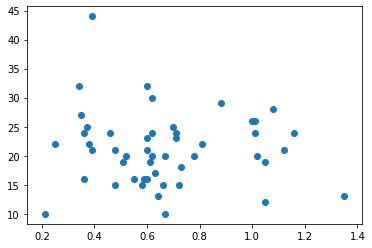

[[ 0.06788376 -0.1228699 ]
 [-0.1228699  39.23639456]]
Pearsons correlation: -0.075
p value: 0.6072
Accept null hypothesis that the means are equal.


In [671]:
#sum of nonsocial  / aq
pyplot.scatter(nonsocial_sum, aq)
pyplot.show()
covariance = cov(nonsocial_sum, aq)
print(covariance)
corr, _ = pearsonr(nonsocial_sum, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocial_sum, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [672]:
##############################################################################################

In [451]:
## total --  spent more on social vs non-social

print(sum(wtpdata.moresocial))

29


In [452]:
allmoresocials= pd.read_csv('allmoresocials.csv')
print(allmoresocials)

                 participant  avg_spent_social  avg_spent_nonsocial  \
0   5beaed3f0af61d0001968d9a          0.033846             0.030000   
1   5e70d4869ffb1404cb1f5070          0.024444             0.022174   
2   5efc9ea8f8e7950584b12e87          0.032258             0.031579   
3   5f3964ca4539e00bd5ce47fb          0.028750             0.028077   
4   5f793609f8089e53266336f5          0.030233             0.030000   
5   60fd9a010279e0f7e338571a          0.031154             0.026667   
6   60fdae513bfebe2fe0122138          0.030435             0.025769   
7   60fe2fb42ec6d443757a92fc          0.033571             0.032727   
8   60ff2035293107014b9770e8          0.032143             0.029167   
9   610040d9d3e1fbd63a3f41e5          0.029200             0.028000   
10  6100b292b7fc7f30ec9132dc          0.030303             0.027059   
11  6101667971d68405d105698a          0.025455             0.025357   
12  61023e0830e893bec6bd8f3c          0.029032             0.028947   
13  61

In [453]:
socialavg = allmoresocials.avg_spent_social
#calculate group mean for av spent on social experiences
social_M = mean(socialavg)
print('group mean: %.12f'% (social_M))
print('standard error of the mean: %.12f'% (sem(socialavg)))

group mean: 0.030367217793
standard error of the mean: 0.000765467731


In [454]:
nonsocialavg = allmoresocials.avg_spent_nonsocial
#calculate group mean for av spent on non-social experiences
nonsocial_M = mean(nonsocialavg)
print('group mean: %.12f'% (nonsocial_M))
print('standard error of the mean: %.12f'% (sem(nonsocialavg)))

group mean: 0.027815868793
standard error of the mean: 0.000791041285


In [455]:
#sample size
n = len(allmoresocials)
print(n)

29


In [456]:
#Calculate STD
# sum squared difference between observations
d1 = sum([(socialavg[i]-nonsocialavg[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([socialavg[i]-nonsocialavg[i] for i in range(n)])
print(d1,d2)

# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)

#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)

0.00033208139412336705 0.07398912099999999
0.0022623417407091556
0.0004201063146130469


In [457]:
# calculate the t statistic
t_stat = (social_M - nonsocial_M) / sed
print(t_stat)

6.073103191390988


In [458]:
# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

28


In [459]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=6.073, df=28, cv=1.701, p=0.000
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


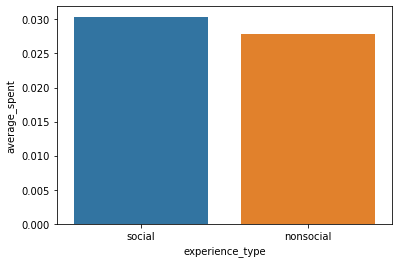

In [369]:
wtp_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'average_spent': [social_M, nonsocial_M]})

wtp_plot = sns.barplot(x=wtp_means.experience_type, y=wtp_means.average_spent, data=wtp_means)


In [460]:
#calculate effect size- cohens d

cohens_d = (mean(socialavg) - mean(nonsocialavg)) / (sqrt((stdev(socialavg) ** 2 + stdev(nonsocialavg) ** 2) / 2))

print(cohens_d)


0.608682219770006


In [462]:
prop_social = allmoresocials['prop_social']
aq = allmoresocials.AQ #autism quotient
mspss = allmoresocials.MSPSS #perceived social support


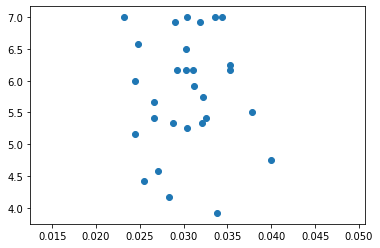

[[ 1.69922846e-05 -5.19022079e-05]
 [-5.19022079e-05  8.00150520e-01]]
Pearsons correlation: -0.014
p value: 0.9422
Accept null hypothesis that the means are equal.


In [463]:
#amount spent on social / mulitdimensional scale of perceived social support
pyplot.scatter(socialavg, mspss)
pyplot.show()
covariance = cov(socialavg, mspss)
print(covariance)
corr, _ = pearsonr(socialavg, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

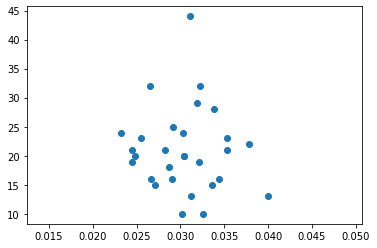

[[ 1.69922846e-05 -2.47059254e-03]
 [-2.47059254e-03  5.22857143e+01]]
Pearsons correlation: -0.083
p value: 0.6690
Accept null hypothesis that the means are equal.


In [464]:
#amount spent on social / aq
pyplot.scatter(socialavg, aq)
pyplot.show()
covariance = cov(socialavg, aq)
print(covariance)
corr, _ = pearsonr(socialavg, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


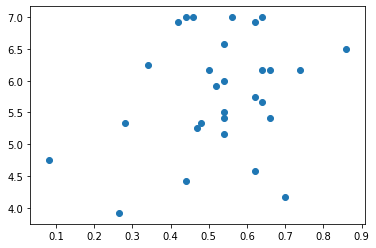

[[0.02456298 0.03784755]
 [0.03784755 0.80015052]]
Pearsons correlation: 0.270
p value: 0.1567
Accept null hypothesis that the means are equal.


In [465]:
##### prop of chosen social // self report #####
#prop of chosen social // MSPSS
pyplot.scatter(prop_social, mspss)
pyplot.show()
covariance = cov(prop_social, mspss)
print(covariance)
corr, _ = pearsonr(prop_social, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


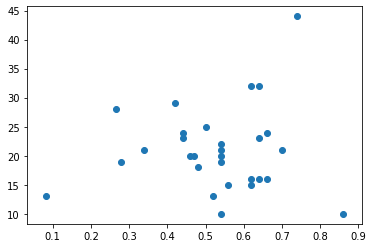

[[2.45629830e-02 9.48104955e-02]
 [9.48104955e-02 5.22857143e+01]]
Pearsons correlation: 0.084
p value: 0.6661
Accept null hypothesis that the means are equal.


In [466]:
# prop social // aq
pyplot.scatter(prop_social, aq)
pyplot.show()
covariance = cov(prop_social, aq)
print(covariance)
corr, _ = pearsonr(prop_social, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, aq)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


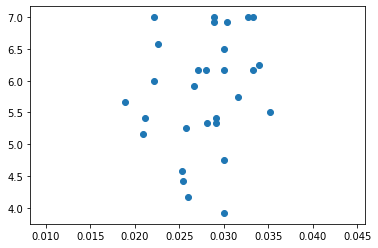

[[1.81466431e-05 7.60745099e-04]
 [7.60745099e-04 8.00150520e-01]]
Pearsons correlation: 0.200
p value: 0.2991
Accept null hypothesis that the means are equal.


In [467]:
##### avg spent on nonsocial // self report #####
# nonsocial // mspss (social support)
pyplot.scatter(nonsocialavg, mspss)
pyplot.show()
covariance = cov(nonsocialavg, mspss)
print(covariance)
corr, _ = pearsonr(nonsocialavg, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


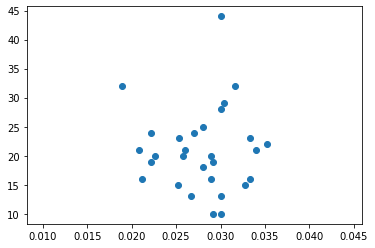

[[ 1.81466431e-05 -8.23825214e-04]
 [-8.23825214e-04  5.22857143e+01]]
Pearsons correlation: -0.027
p value: 0.8905
Accept null hypothesis that the means are equal.


In [468]:
# nonsocial // aq
pyplot.scatter(nonsocialavg, aq)
pyplot.show()
covariance = cov(nonsocialavg, aq)
print(covariance)
corr, _ = pearsonr(nonsocialavg, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [469]:
###################################
#### t stat for proportions ####

In [470]:
prop_socialavg= allmoresocials.prop_social
#calculate group mean for prop of chosen social experiences
prop_soc_M = mean(prop_socialavg)
print('mean: %.12f'% (prop_soc_M))


mean: 0.529528501034


In [471]:
prop_nonsocialavg= allmoresocials.prop_nonsocial
#calculate group mean for prop of chosen social experiences
prop_nonsoc_M = mean(prop_nonsocialavg)
print('mean: %.12f'% (prop_nonsoc_M))

mean: 0.470471498966


In [472]:
#Calculate STD
# sum squared difference between observations
d1 = sum([(prop_socialavg[i]-prop_nonsocialavg[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([prop_socialavg[i]-prop_nonsocialavg[i] for i in range(n)])
print(d1,d2)

2.8521982518017497 1.71265306


In [473]:
# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)


0.3134516422315245


In [474]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)


0.05820650870633522


In [475]:
# calculate the t statistic
t_stat = (prop_soc_M - prop_nonsoc_M) / sed
print(t_stat)


1.014611653946146


In [476]:
# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

28


In [477]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')


t=1.015, df=28, cv=1.701, p=0.319
Accept null hypothesis that the means are equal.
Accept null hypothesis that the means are equal.


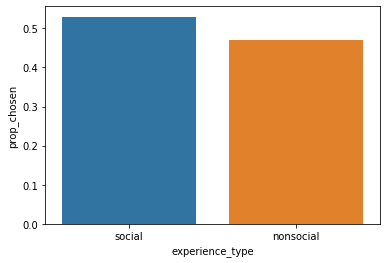

In [478]:
wtp_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'prop_chosen': [prop_soc_M, prop_nonsoc_M]})

wtp_plot = sns.barplot(x=wtp_means.experience_type, y=wtp_means.prop_chosen, data=wtp_means)


In [479]:
###################################
#### t stats for sums #####

In [480]:
social_sum= allmoresocials.total_spent_social
#calculate group mean for prop of chosen social experiences
social_sum_M = mean(social_sum)
print('mean: %.12f'% (social_sum_M))


mean: 0.792758620690


In [481]:
nonsocial_sum= allmoresocials.total_spent_nonsocial
#calculate group mean for prop of chosen social experiences
nonsocial_sum_M = mean(nonsocial_sum)
print('mean: %.12f'% (nonsocial_sum_M))

mean: 0.655862068966


In [482]:
# sum squared difference between observations
d1 = sum([(social_sum[i]-nonsocial_sum[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([social_sum[i]-nonsocial_sum[i] for i in range(n)])
print(d1,d2)

# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)


6.678300000000003 3.9699999999999998
0.46808197884158737


In [483]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)

0.0869206413555722


In [484]:
# calculate the t statistic
t_stat = (social_sum_M - nonsocial_sum_M) / sed
print(t_stat)

1.574960211857226


In [485]:
# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

28


In [486]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')


t=1.575, df=28, cv=1.701, p=0.126
Accept null hypothesis that the means are equal.
Accept null hypothesis that the means are equal.


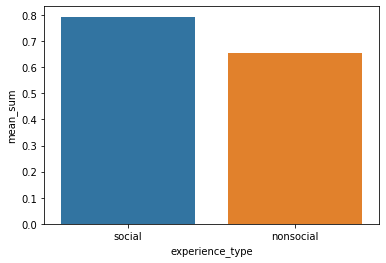

In [487]:
wtp_sum_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'mean_sum': [social_sum_M, nonsocial_sum_M]})

wtp_plot = sns.barplot(x=wtp_sum_means.experience_type, y=wtp_sum_means.mean_sum, data=wtp_sum_means)
